In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

# change inline to auto if you have Spyder installed
%matplotlib inline

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.31 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  35.84 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  54.50 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.44 MB/s
vincent-0.4.4- 100% |###################

Putting Wikipedia table into a dataframe and assigning column names

In [2]:
wiki = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
wiki_list = pd.read_html(wiki)

In [4]:
df = wiki_list[0]

In [5]:
df.shape

(290, 3)

In [6]:
df

,0,1,2
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Not assigned


In [11]:
df = df[1:]

In [12]:
df.columns = ['Postcodes','Borough','Neighborhood']

Ignore cells with a borough that is Not assigned

In [13]:
toronto_df = df [df ['Borough'] != 'Not assigned']

In [14]:
toronto_df 

,Postcodes,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Not assigned
11,M9A,Etobicoke,Islington Avenue
12,M1B,Scarborough,Rouge
13,M1B,Scarborough,Malvern


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [15]:
toronto_df['Neighborhood'] = toronto_df.apply(
    lambda row: row['Borough'] if row['Neighborhood'] == 'Not assigned' else row['Neighborhood'],axis = 1)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
toronto_df

,Postcodes,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Queen's Park
11,M9A,Etobicoke,Islington Avenue
12,M1B,Scarborough,Rouge
13,M1B,Scarborough,Malvern


For Rows which have More than one neighborhood in one postal code area will be combined into one row with the neighborhoods separated with a comma.

In [17]:
toronto_df_final = toronto_df.groupby(['Postcodes','Borough']).Neighborhood.agg([('Neighborhood', ', '.join)]).reset_index()

Shape and view of final dataframe

In [18]:
toronto_df_final.shape

(103, 3)

In [19]:
toronto_df_final

,Postcodes,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Imported csv file for latitude and longtude

In [20]:

import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_5b335a8674f940eda2a51e5945b2b0ba = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vEGXVggxwqhuinJKFRWYbwSP3Hsim0xycgN7m2HspuI9',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5b335a8674f940eda2a51e5945b2b0ba.get_object(Bucket='ds-donotdelete-pr-dlh8zp9ux5casv',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.columns = ['Postcodes','Latitude','Longitude']
df_data_1.head()


,Postcodes,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
df_final = pd.merge(toronto_df_final, df_data_1, on='Postcodes')

In [22]:
df_final

,Postcodes,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [23]:
CLIENT_ID = 'EKWRXD1IYYLNISWO1JEAOHCPQKUTQJHTWV0EJIXVB3XVYLLN' # your Foursquare ID
CLIENT_SECRET = 'IKNOYD4RYJVOEM3QEME31GEZ5HG0D1ARN2IFJEKTAR44QE4Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
radius= 1000
search_query = ''
categoryId = '4bf58dd8d48988d175941735'

In [20]:
df_gym_count = pd.DataFrame({'Postcodes': [], 'Gym_count': []})

In [21]:
df_gym_count.shape

(0, 2)

In [22]:
for index, row in df_final.iterrows():
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT,categoryId)
    results = requests.get(url).json()
    result_str = str(results)
    X = result_str.count("Address")
    df_gym_count = df_gym_count.append({'Postcodes': row["Postcodes"], 'Gym_count': X}, ignore_index=True)

In [23]:
df_gym_count

,Gym_count,Postcodes
0,5.0,M1B
1,1.0,M1C
2,0.0,M1E
3,0.0,M1G
4,12.0,M1H
5,3.0,M1J
6,2.0,M1K
7,5.0,M1L
8,3.0,M1M
9,4.0,M1N


In [24]:
df_final = pd.merge(df_final, df_gym_count, on='Postcodes')

In [25]:
df_final

,Postcodes,Borough,Neighborhood,Latitude,Longitude,Gym_count
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,4.0


In [26]:

body = client_5b335a8674f940eda2a51e5945b2b0ba.get_object(Bucket='ds-donotdelete-pr-dlh8zp9ux5casv',Key='Canada_pop.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.columns = ['Postcodes','Population']

In [27]:
df_data_3.head()

,Postcodes,Population
0,Canada,33476688
1,A0A,46297
2,A0B,20985
3,A0C,12834
4,A0E,23384


In [28]:
df_toronto = df_final.set_index('Postcodes').join(df_data_3.set_index('Postcodes'))

In [29]:
df_toronto

,Borough,Neighborhood,Latitude,Longitude,Gym_count,Population
Postcodes,,,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0,67251.0
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,35601.0
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,46398.0
M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,30243.0
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0,23706.0
M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0,36163.0
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0,47286.0
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0,32981.0
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,22919.0


In [30]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

Text(0.5,1,'Data_Plot')

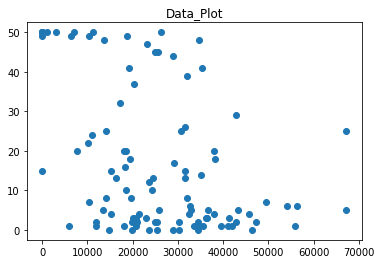

In [72]:
plt.scatter(df_toronto.Population, df_toronto.Gym_count)
plt.title('Data_Plot')

In [81]:
df_toronto_KM = df_toronto[['Gym_count','Population']]
df_toronto_KM = df_toronto_KM.dropna()

In [82]:
df_toronto_KM

,Gym_count,Population
Postcodes,,
M1B,5.0,67251.0
M1C,1.0,35601.0
M1E,0.0,46398.0
M1G,0.0,30243.0
M1H,12.0,23706.0
M1J,3.0,36163.0
M1K,2.0,47286.0
M1L,5.0,32981.0
M1M,3.0,22919.0


In [83]:
df_toronto_KM .Population = df_toronto_KM.Population/1000

In [84]:
df_toronto_KM

,Gym_count,Population
Postcodes,,
M1B,5.0,67.251
M1C,1.0,35.601
M1E,0.0,46.398
M1G,0.0,30.243
M1H,12.0,23.706
M1J,3.0,36.163
M1K,2.0,47.286
M1L,5.0,32.981
M1M,3.0,22.919


In [102]:
km = KMeans(n_clusters=5).fit(df_toronto_KM)

In [104]:
labels = km.predict(df_toronto_KM)
centroids = km.cluster_centers_

In [105]:
labels


array([0, 3, 0, 3, 1, 3, 0, 3, 1, 1, 3, 3, 3, 3, 0, 0, 1, 3, 0, 1, 1, 3, 0,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 2, 4, 2, 2,
       4, 4, 1, 3, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 4, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 3, 1, 3, 0, 3], dtype=int32)

In [106]:
centroids

array([[  6.22222222,  54.42522222],
       [  9.33333333,  16.43318182],
       [ 39.86666667,  27.44766667],
       [  4.96969697,  33.88715152],
       [ 49.58333333,   4.41283333]])

In [109]:
cluster_map = pd.DataFrame()
cluster_map['Postcodes']=df_toronto_KM.index.values
cluster_map['Cluster']  = km.labels_

In [110]:
cluster_map

,Postcodes,Cluster
0,M1B,0
1,M1C,3
2,M1E,0
3,M1G,3
4,M1H,1
5,M1J,3
6,M1K,0
7,M1L,3
8,M1M,1
9,M1N,1


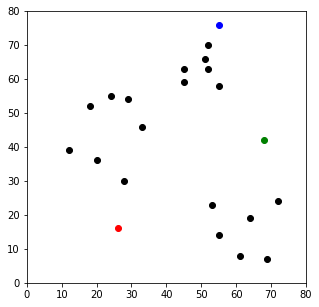

In [90]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

TypeError: object of type 'map' has no len()

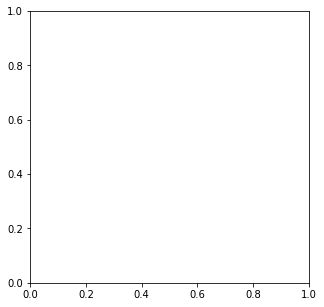

In [91]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df_toronto_KM['Gym_count'], df_toronto_KM['Population'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()